<a href="https://colab.research.google.com/github/GuusRodrigues/Predi-o-de-Doen-a-Card-aca/blob/main/Predi%C3%A7%C3%A3o_de_Doen%C3%A7a_Card%C3%ADaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Inteligência Artificial – Predição de Doença Cardíaca**

Aluno: Gustavo Rodrigues

Base de dados: UCI Heart Disease

Objetivo: Construir e comparar modelos de machine learning para prever a presença de doença cardíaca

**Nível I – Criar Modelo com dados**

Importar bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Carregar dados

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=columns, na_values='?')

Análise exploratória (EDA)

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


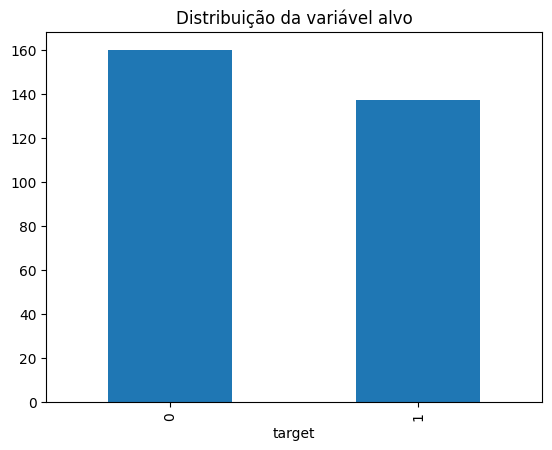

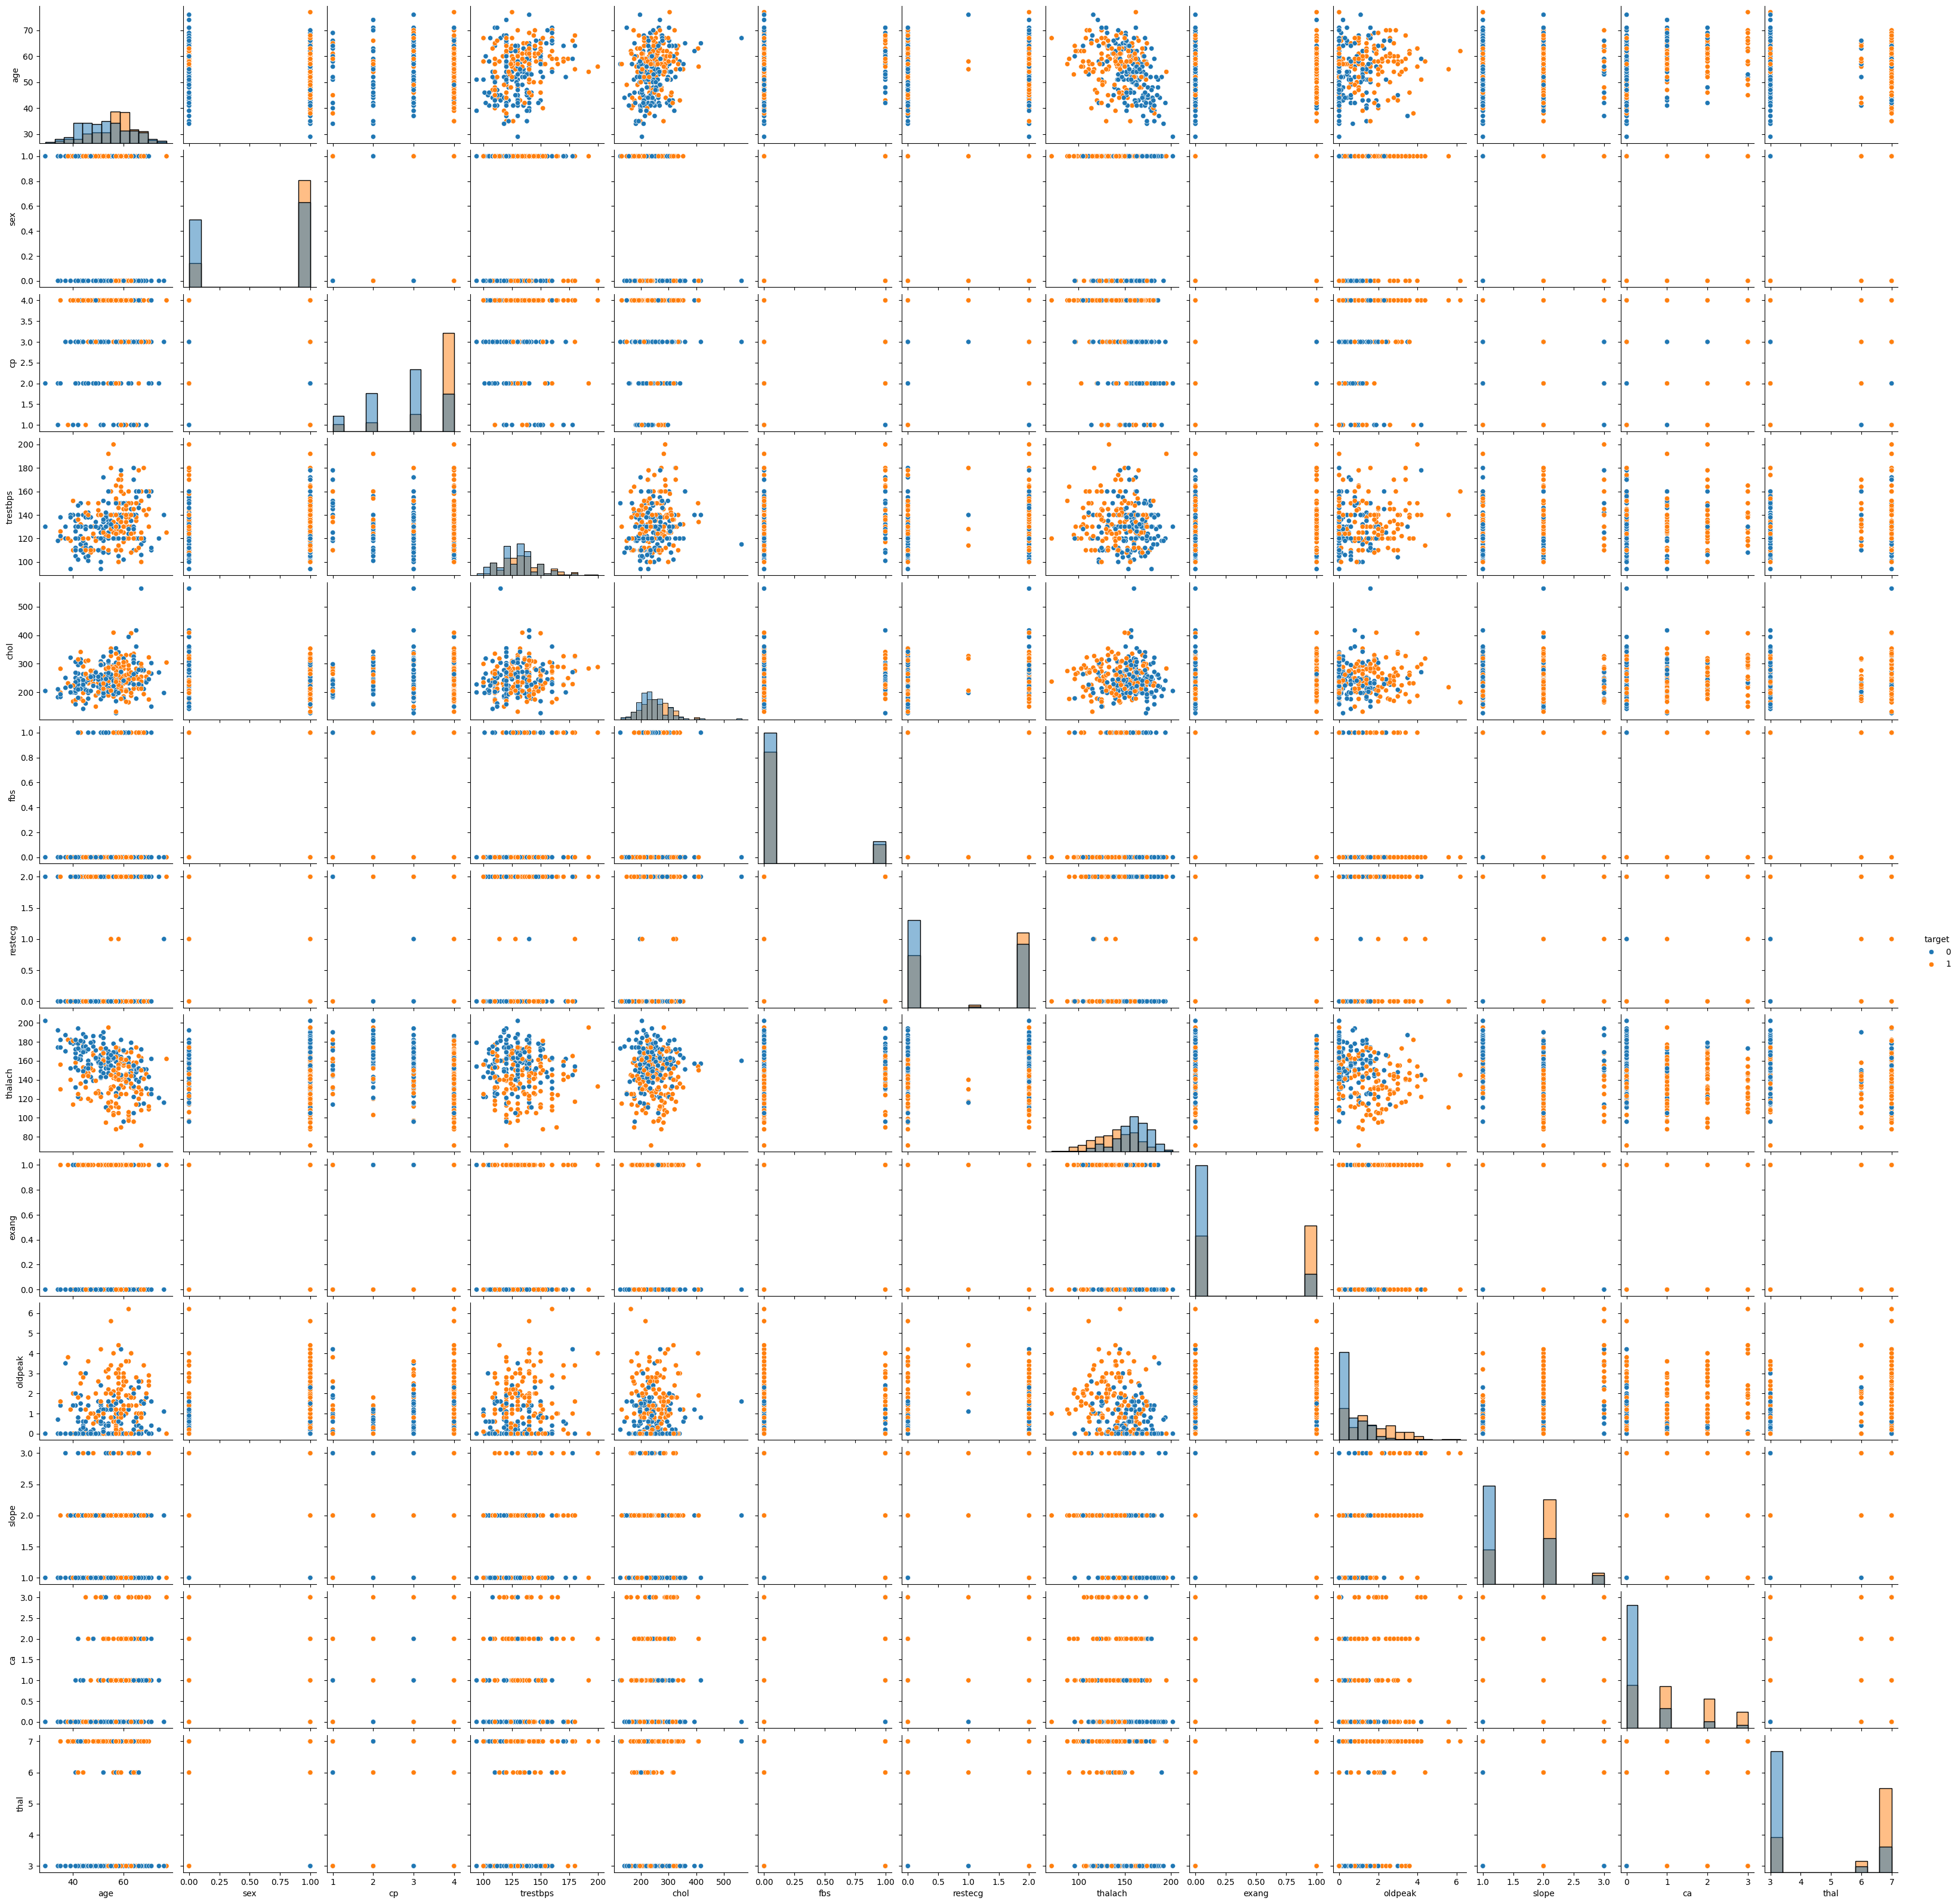

In [8]:
df.info()
df.describe()
df['target'].value_counts().plot(kind='bar', title='Distribuição da variável alvo')
plt.show()
sns.pairplot(df.dropna(), hue='target', diag_kind='hist')
plt.show()

In [7]:
df = df.dropna()  # Remover linhas com valores ausentes
df.loc[:, 'target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Binário

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Separar treino e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Treinar e avaliar modelos

In [10]:
# Regressão logística
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

# Árvore de decisão
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

# Avaliação
acc_logreg = accuracy_score(y_test, pred_logreg)
acc_tree = accuracy_score(y_test, pred_tree)

print(f'Acurácia - Regressão Logística: {acc_logreg:.2f}')
print(f'Acurácia - Árvore de Decisão: {acc_tree:.2f}')

Acurácia - Regressão Logística: 0.87
Acurácia - Árvore de Decisão: 0.80


Relatório - Regressão Logística
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



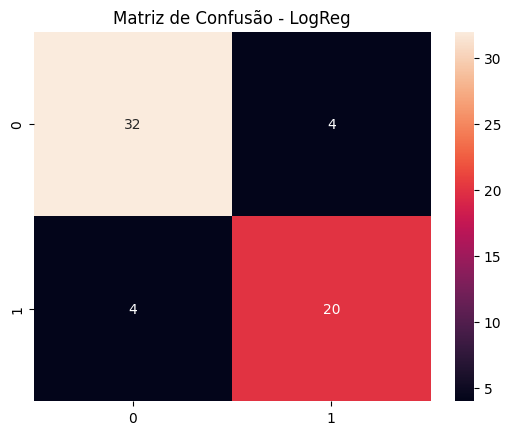

Relatório - Árvore de Decisão
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.70      0.88      0.78        24

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.82      0.80      0.80        60



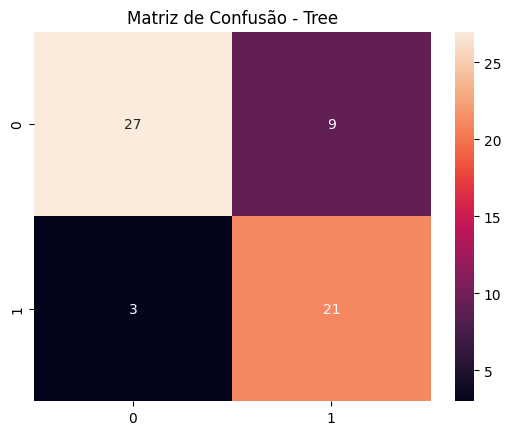

In [11]:
print("Relatório - Regressão Logística")
print(classification_report(y_test, pred_logreg))
sns.heatmap(confusion_matrix(y_test, pred_logreg), annot=True, fmt='d')
plt.title("Matriz de Confusão - LogReg")
plt.show()

print("Relatório - Árvore de Decisão")
print(classification_report(y_test, pred_tree))
sns.heatmap(confusion_matrix(y_test, pred_tree), annot=True, fmt='d')
plt.title("Matriz de Confusão - Tree")
plt.show()

**Nível II - Avaliação melhorada**

In [23]:
from sklearn.utils import shuffle

accs_logreg = []
accs_tree = []

for _ in range(30):
    X_, y_ = shuffle(X_scaled, y, random_state=None)
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2)

    logreg = LogisticRegression(max_iter=500)
    logreg.fit(X_train, y_train)
    accs_logreg.append(accuracy_score(y_test, logreg.predict(X_test)))

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    accs_tree.append(accuracy_score(y_test, tree.predict(X_test)))

# Resultados estatísticos
print(f'Logistic Regression - Média: {np.mean(accs_logreg):.2f}, Desvio: {np.std(accs_logreg):.2f}')
print(f'Decision Tree       - Média: {np.mean(accs_tree):.2f}, Desvio: {np.std(accs_tree):.2f}')

Logistic Regression - Média: 0.84, Desvio: 0.03
Decision Tree       - Média: 0.73, Desvio: 0.06


In [24]:
import pickle

with open('modelo_logreg.pkl', 'wb') as f:
    pickle.dump(logreg, f)

Criar interface com Gradio

In [25]:
!pip install gradio

In [27]:
import gradio as gr
import numpy as np
import pickle

# Mapeamento de entradas descritivas para valores numéricos
sex_map = {"Feminino": 0, "Masculino": 1}
cp_map = {
    "Angina típica": 0,
    "Angina atípica": 1,
    "Dor não anginosa": 2,
    "Assintomático": 3
}
fbs_map = {"Não": 0, "Sim": 1}
restecg_map = {
    "Normal": 0,
    "Anormalidade ST-T": 1,
    "Hipertrofia ventricular esquerda": 2
}
exang_map = {"Não": 0, "Sim": 1}
slope_map = {"Ascendente": 0, "Plano": 1, "Descendente": 2}
thal_map = {
    "Normal": 3,
    "Defeito fixo": 6,
    "Defeito reversível": 7
}

def preve_doenca(age, sex, cp, trestbps, chol, fbs, restecg,
                 thalach, exang, oldpeak, slope, ca, thal):
    input_data = np.array([[
        age,
        sex_map[sex],
        cp_map[cp],
        trestbps,
        chol,
        fbs_map[fbs],
        restecg_map[restecg],
        thalach,
        exang_map[exang],
        oldpeak,
        slope_map[slope],
        ca,
        thal_map[thal]
    ]])
    input_scaled = scaler.transform(input_data)

    with open('modelo_logreg.pkl', 'rb') as f:
        modelo = pickle.load(f)
    resultado = modelo.predict(input_scaled)
    return "Risco de Doença Cardíaca" if resultado[0] == 1 else "Baixo Risco"

interface = gr.Interface(
    fn=preve_doenca,
    inputs=[
        gr.Number(label="Idade"),
        gr.Radio(list(sex_map.keys()), label="Sexo"),
        gr.Radio(list(cp_map.keys()), label="Tipo de dor no peito"),
        gr.Number(label="Pressão arterial em repouso (mm Hg)"),
        gr.Number(label="Colesterol sérico (mg/dl)"),
        gr.Radio(list(fbs_map.keys()), label="Glicose em jejum > 120 mg/dl"),
        gr.Radio(list(restecg_map.keys()), label="Resultado do ECG em repouso"),
        gr.Number(label="Frequência cardíaca máxima alcançada"),
        gr.Radio(list(exang_map.keys()), label="Angina induzida por esforço"),
        gr.Number(label="Depressão ST induzida pelo exercício (oldpeak)"),
        gr.Radio(list(slope_map.keys()), label="Inclinação do segmento ST"),
        gr.Number(label="Número de vasos principais coloridos por fluoroscopia (0–3)"),
        gr.Radio(list(thal_map.keys()), label="Thalassemia")
    ],
    outputs="text",
    title="Preditor de Doença Cardíaca",
    description="Insira os dados clínicos abaixo para prever o risco de doença cardíaca."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://12c80ffb05bd10b896.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
